In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("E:\Data science training\R AND PYTHON KPMG\stat and ml\ASSIGNMENT\mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Lets perform the backward elimination

# STEP 1: Find your X and Y

X = df[['cyl','disp', 'hp', 'drat', 'wt','qsec','vs','am','gear','carb']]
Y = df[['mpg']]


In [4]:
# STEP 2: Split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1234) 


In [5]:
# STEP 3: Create the blank linear Regression object
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [6]:
# STEP 4: Find the set of effective input variables

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [7]:
column_name = sfs(lm, k_features= 3, forward= False, verbose = 1)


In [8]:
# STEP 5: lets find the name of these 3 columns

final_sfs = column_name.fit(X,Y)

list(final_sfs.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 9/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
Features: 8/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 7/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/3[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/3[Parallel(n_jobs

['cyl', 'hp', 'wt']

In [ ]:
## 'cyl','hp','wt' input variable are impact the milage of the car.

In [9]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [10]:
df_new = df.drop(columns = ['Unnamed: 0'])

In [11]:
df_new.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
# Lets check for the missing values in the columns

df_new.isnull().sum()


mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [13]:
# Lets find the KMO test result

kmo_all, kmo_model = calculate_kmo(df_new)

print(kmo_model)

0.8172608566882735


In [14]:
# Lets create 25 factors to find the right number of factors inwhich this data can be divided

# STEP 1: Create a factor object
# Syntax - FactorAnalyzer(n_factors = number of factor, rotation = None)

fa = FactorAnalyzer(n_factors=25, rotation = None)

In [15]:
# STEP 2: Fit the object on data frame 

fa.fit(df_new)


FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [16]:
# STEP 3: WE will find the eigenvalues using a command get_eigenvalues()

eigen_values, eigen_vector = fa.get_eigenvalues()

eigen_values

array([6.60840025, 2.65046789, 0.62719727, 0.26959744, 0.2234511 ,
       0.21159612, 0.13526199, 0.12290143, 0.07704665, 0.05203544,
       0.02204441])

From the above eigen values we will count how many of them are greater than 1. 
That will be the number of optimal factors in which this data can be divided. 
Thus, we can say that the columns of this data can be clubed into 2 factors as we have 2 eigen values greater than 1.

In [17]:
# Lets create the final factor model for n_factor = 2

fa_final = FactorAnalyzer(n_factors=2, rotation = 'varimax')

# fitting the object

fa_final.fit(df_new)

# printing the loading factor - Which percentage variable explained by each factor for each column

fa_final.loadings_

array([[ 0.67513349, -0.63009293],
       [-0.63413563,  0.73050763],
       [-0.72736214,  0.60737452],
       [-0.31647142,  0.88107685],
       [ 0.8124605 , -0.21895483],
       [-0.78392608,  0.45401531],
       [-0.15050928, -0.87250903],
       [ 0.2954181 , -0.78761255],
       [ 0.90113375,  0.0668503 ],
       [ 0.88180246,  0.15015455],
       [ 0.05485586,  0.80925134]])

In [18]:
# Lets convert this to a data frame

loading_df = pd.DataFrame(fa_final.loadings_, columns=['Factor1', 'Factor2'],
                         index=df_new.columns)

loading_df

,Factor1,Factor2
mpg,0.675133,-0.630093
cyl,-0.634136,0.730508
disp,-0.727362,0.607375
hp,-0.316471,0.881077
drat,0.812460,-0.218955
wt,-0.783926,0.454015
qsec,-0.150509,-0.872509
vs,0.295418,-0.787613
am,0.901134,0.066850
gear,0.881802,0.150155


In [21]:
## from the above we can see tat 'mpg','cyl','cyl' having high co relation in both the factor.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

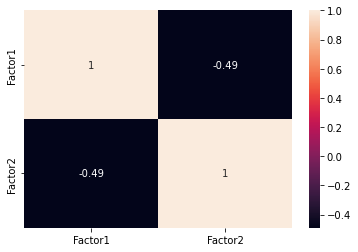

In [20]:

corr = loading_df.corr()
sns.heatmap(corr,annot=True)
